In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Linear Regression libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Problem - 1: Linear Regression

## 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [2]:
comp_df = pd.read_excel("compactiv.xlsx")
comp_df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [3]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [4]:
comp_df.shape

(8192, 22)

In [5]:
comp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


In [6]:
comp_df.runqsz.value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

In [7]:
comp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


### Univariate Analysis

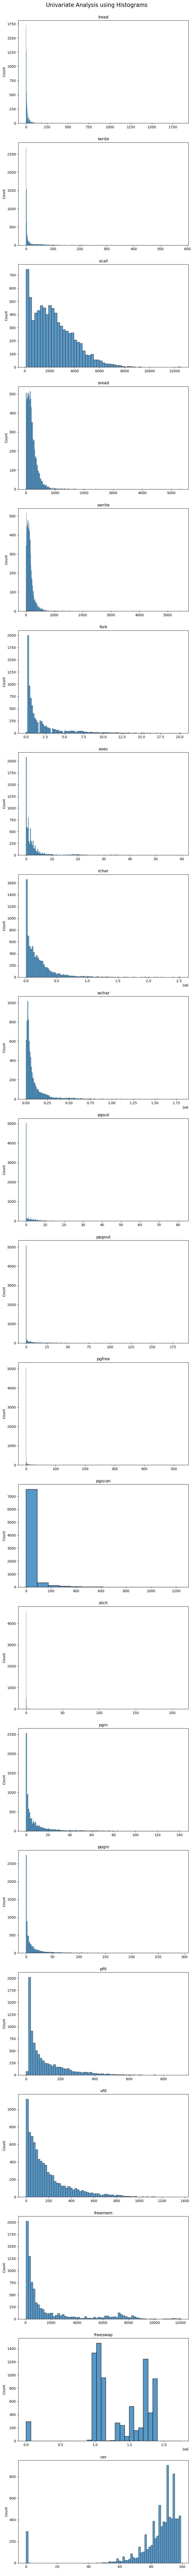

In [8]:
def HistPlot():
    comp_num = comp_df.select_dtypes(exclude='object').columns
    col = len(comp_num)
    plt.figure(figsize=(8, 5 * col))
    plt.suptitle("Univariate Analysis using Histograms", fontsize=16,x=0.5,y=1);
    for i in range(0, col):
        plt.subplot(col, 1, i + 1)
        plt.title("{}".format(comp_num[i]))
        sns.histplot(x=comp_df[comp_num[i]])
        plt.xlabel(xlabel=" ")

    plt.tight_layout()

HistPlot()

In [9]:
comp_df.runqsz.value_counts(1)

Not_CPU_Bound    0.528687
CPU_Bound        0.471313
Name: runqsz, dtype: float64

### Bivariate Analysis

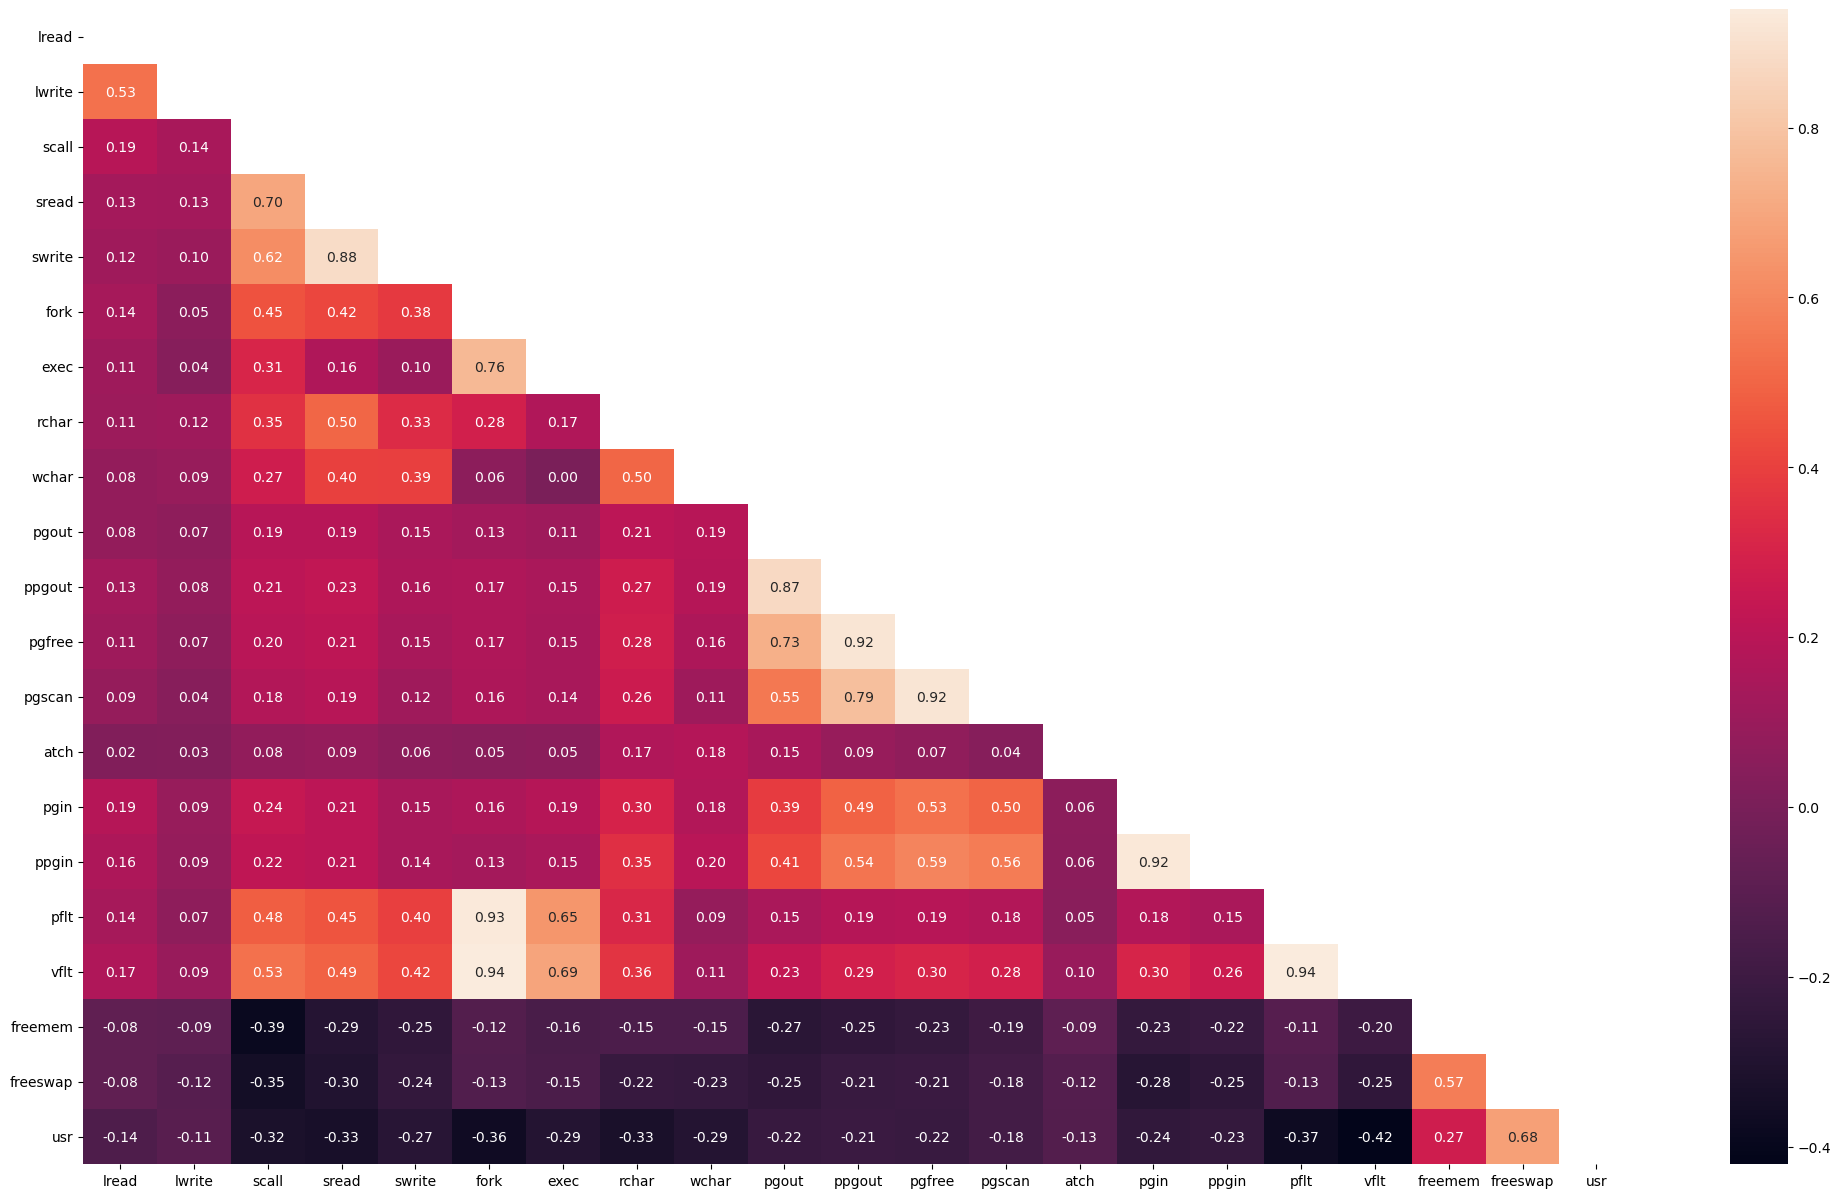

In [10]:
#Visualizing the correlation trends using a Heatmap
corr = comp_df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(comp_df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

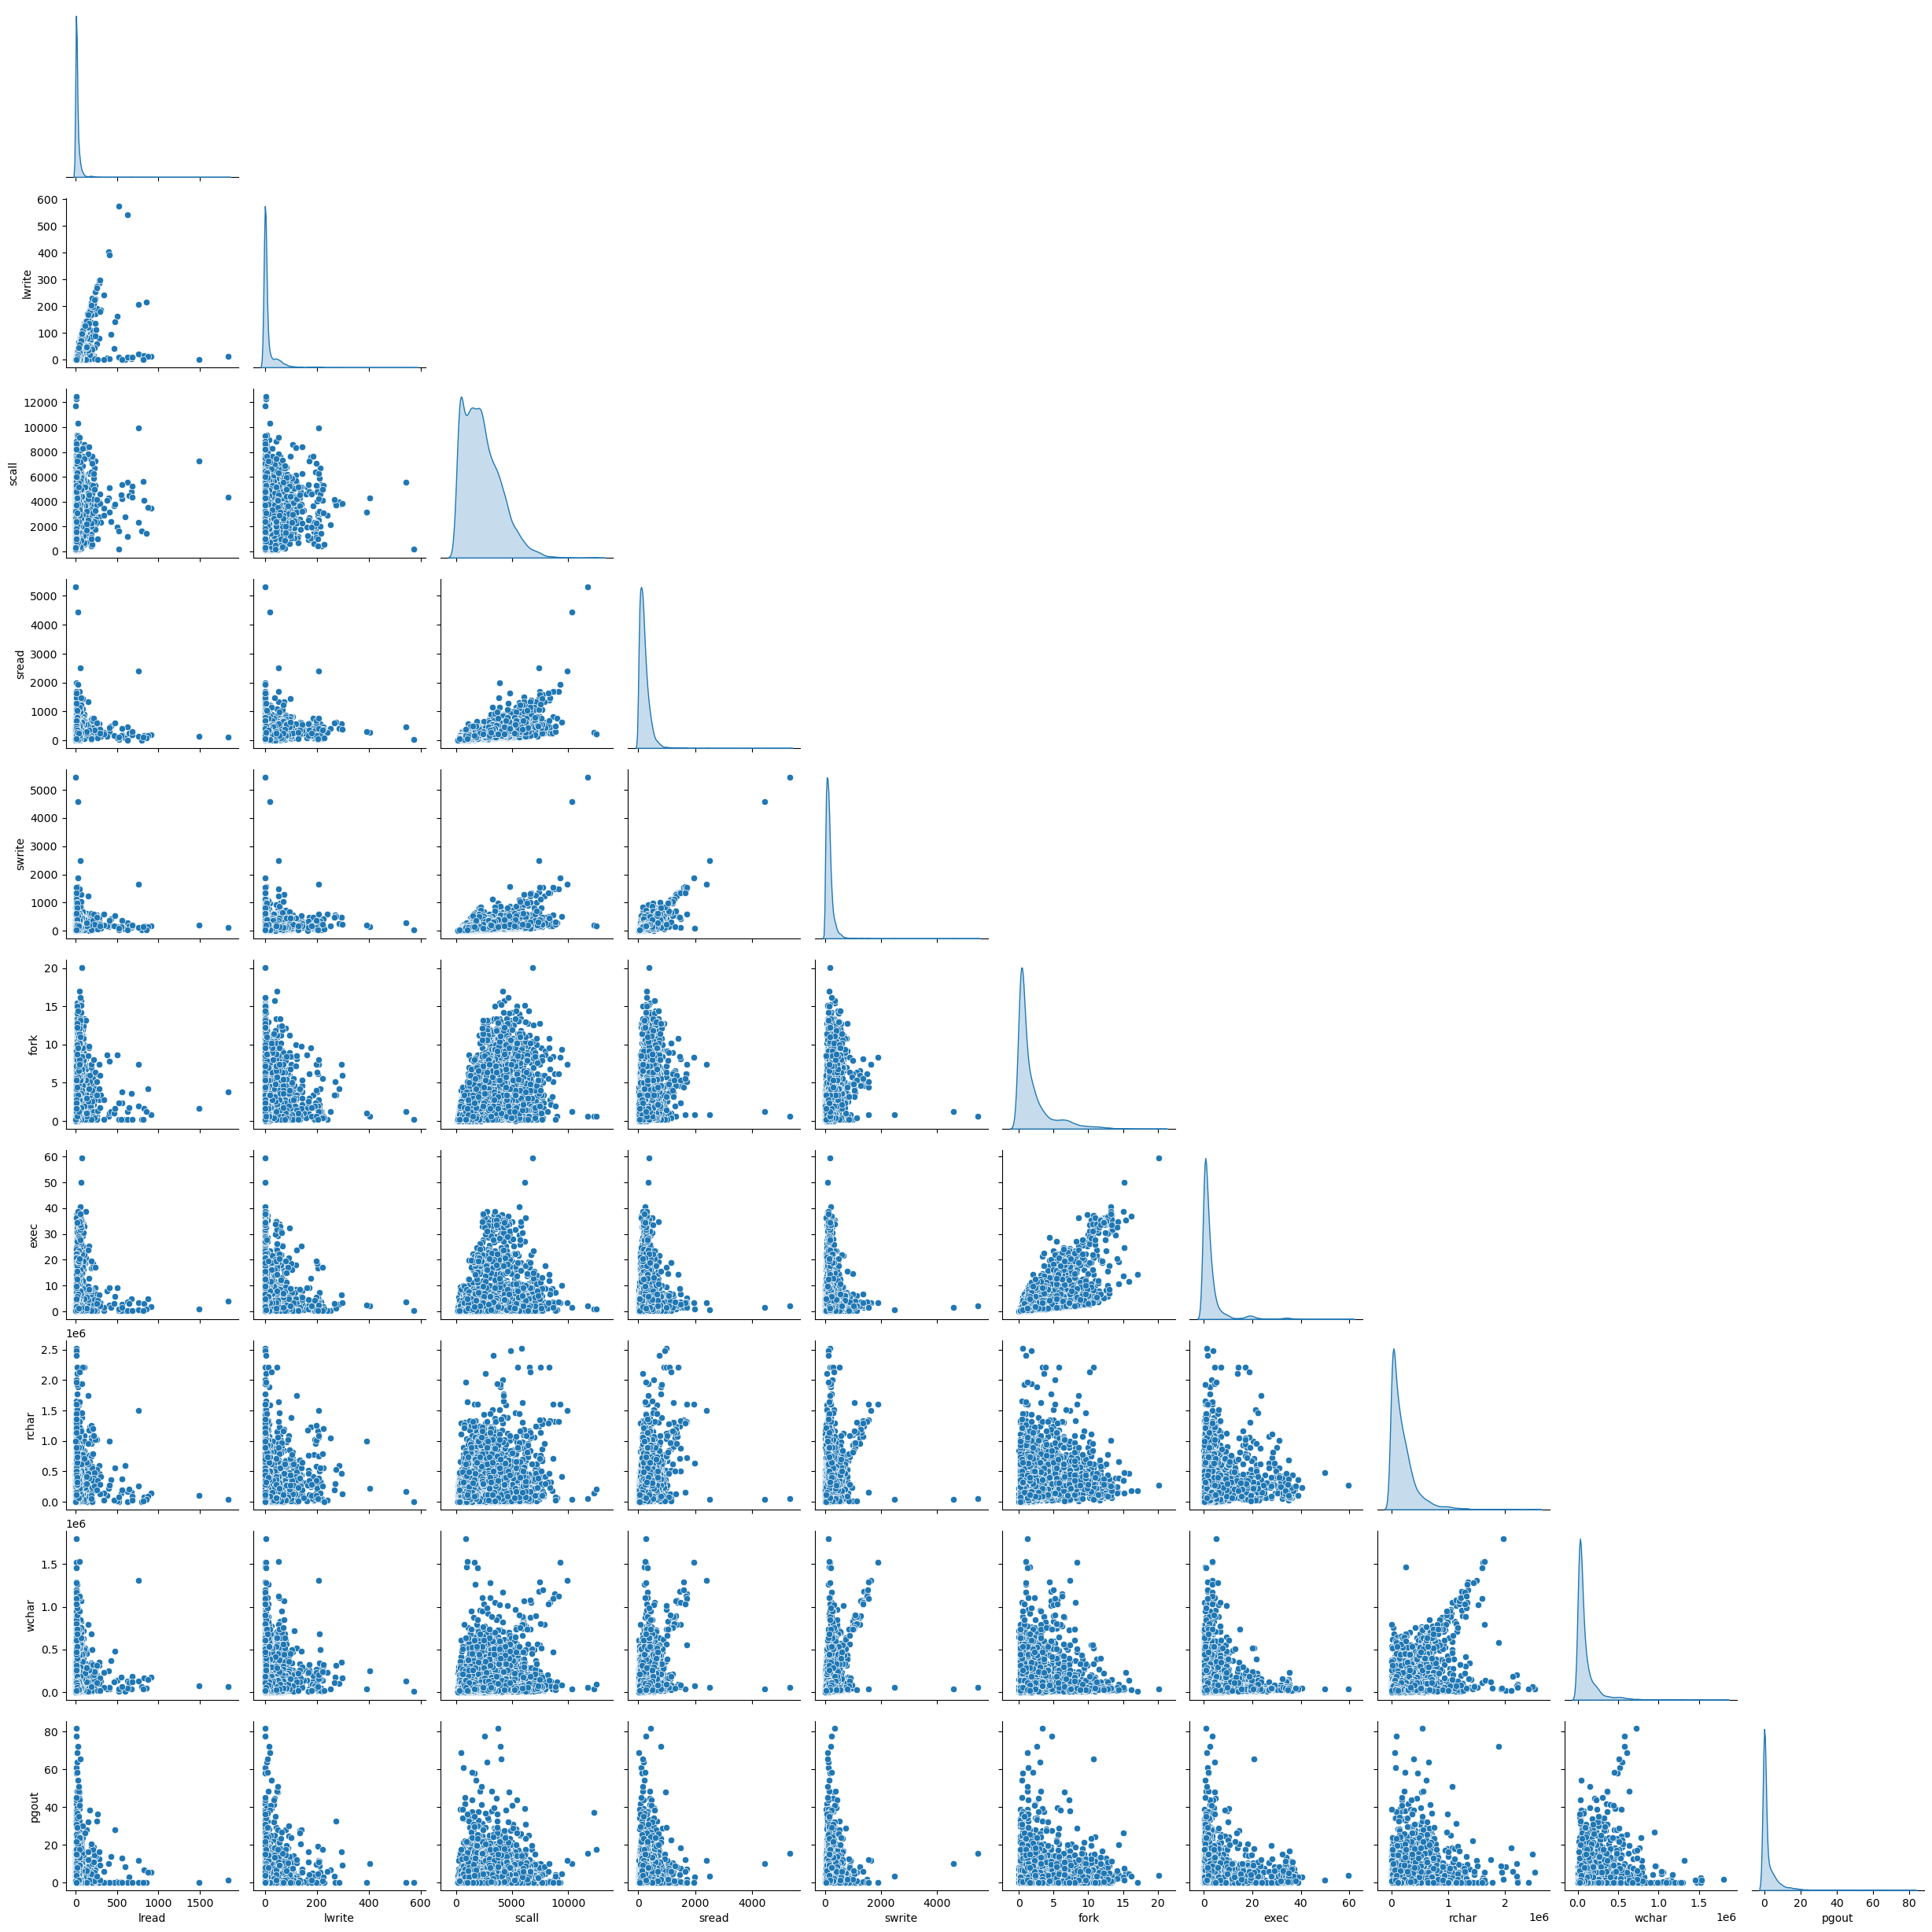

In [11]:
#Visualizing the bivariate data trends among the numeric variables using a Pairplot
comp_num = comp_df.select_dtypes(exclude="object")
sns.pairplot(comp_num.iloc[:,:10],diag_kind="kde",corner=True);

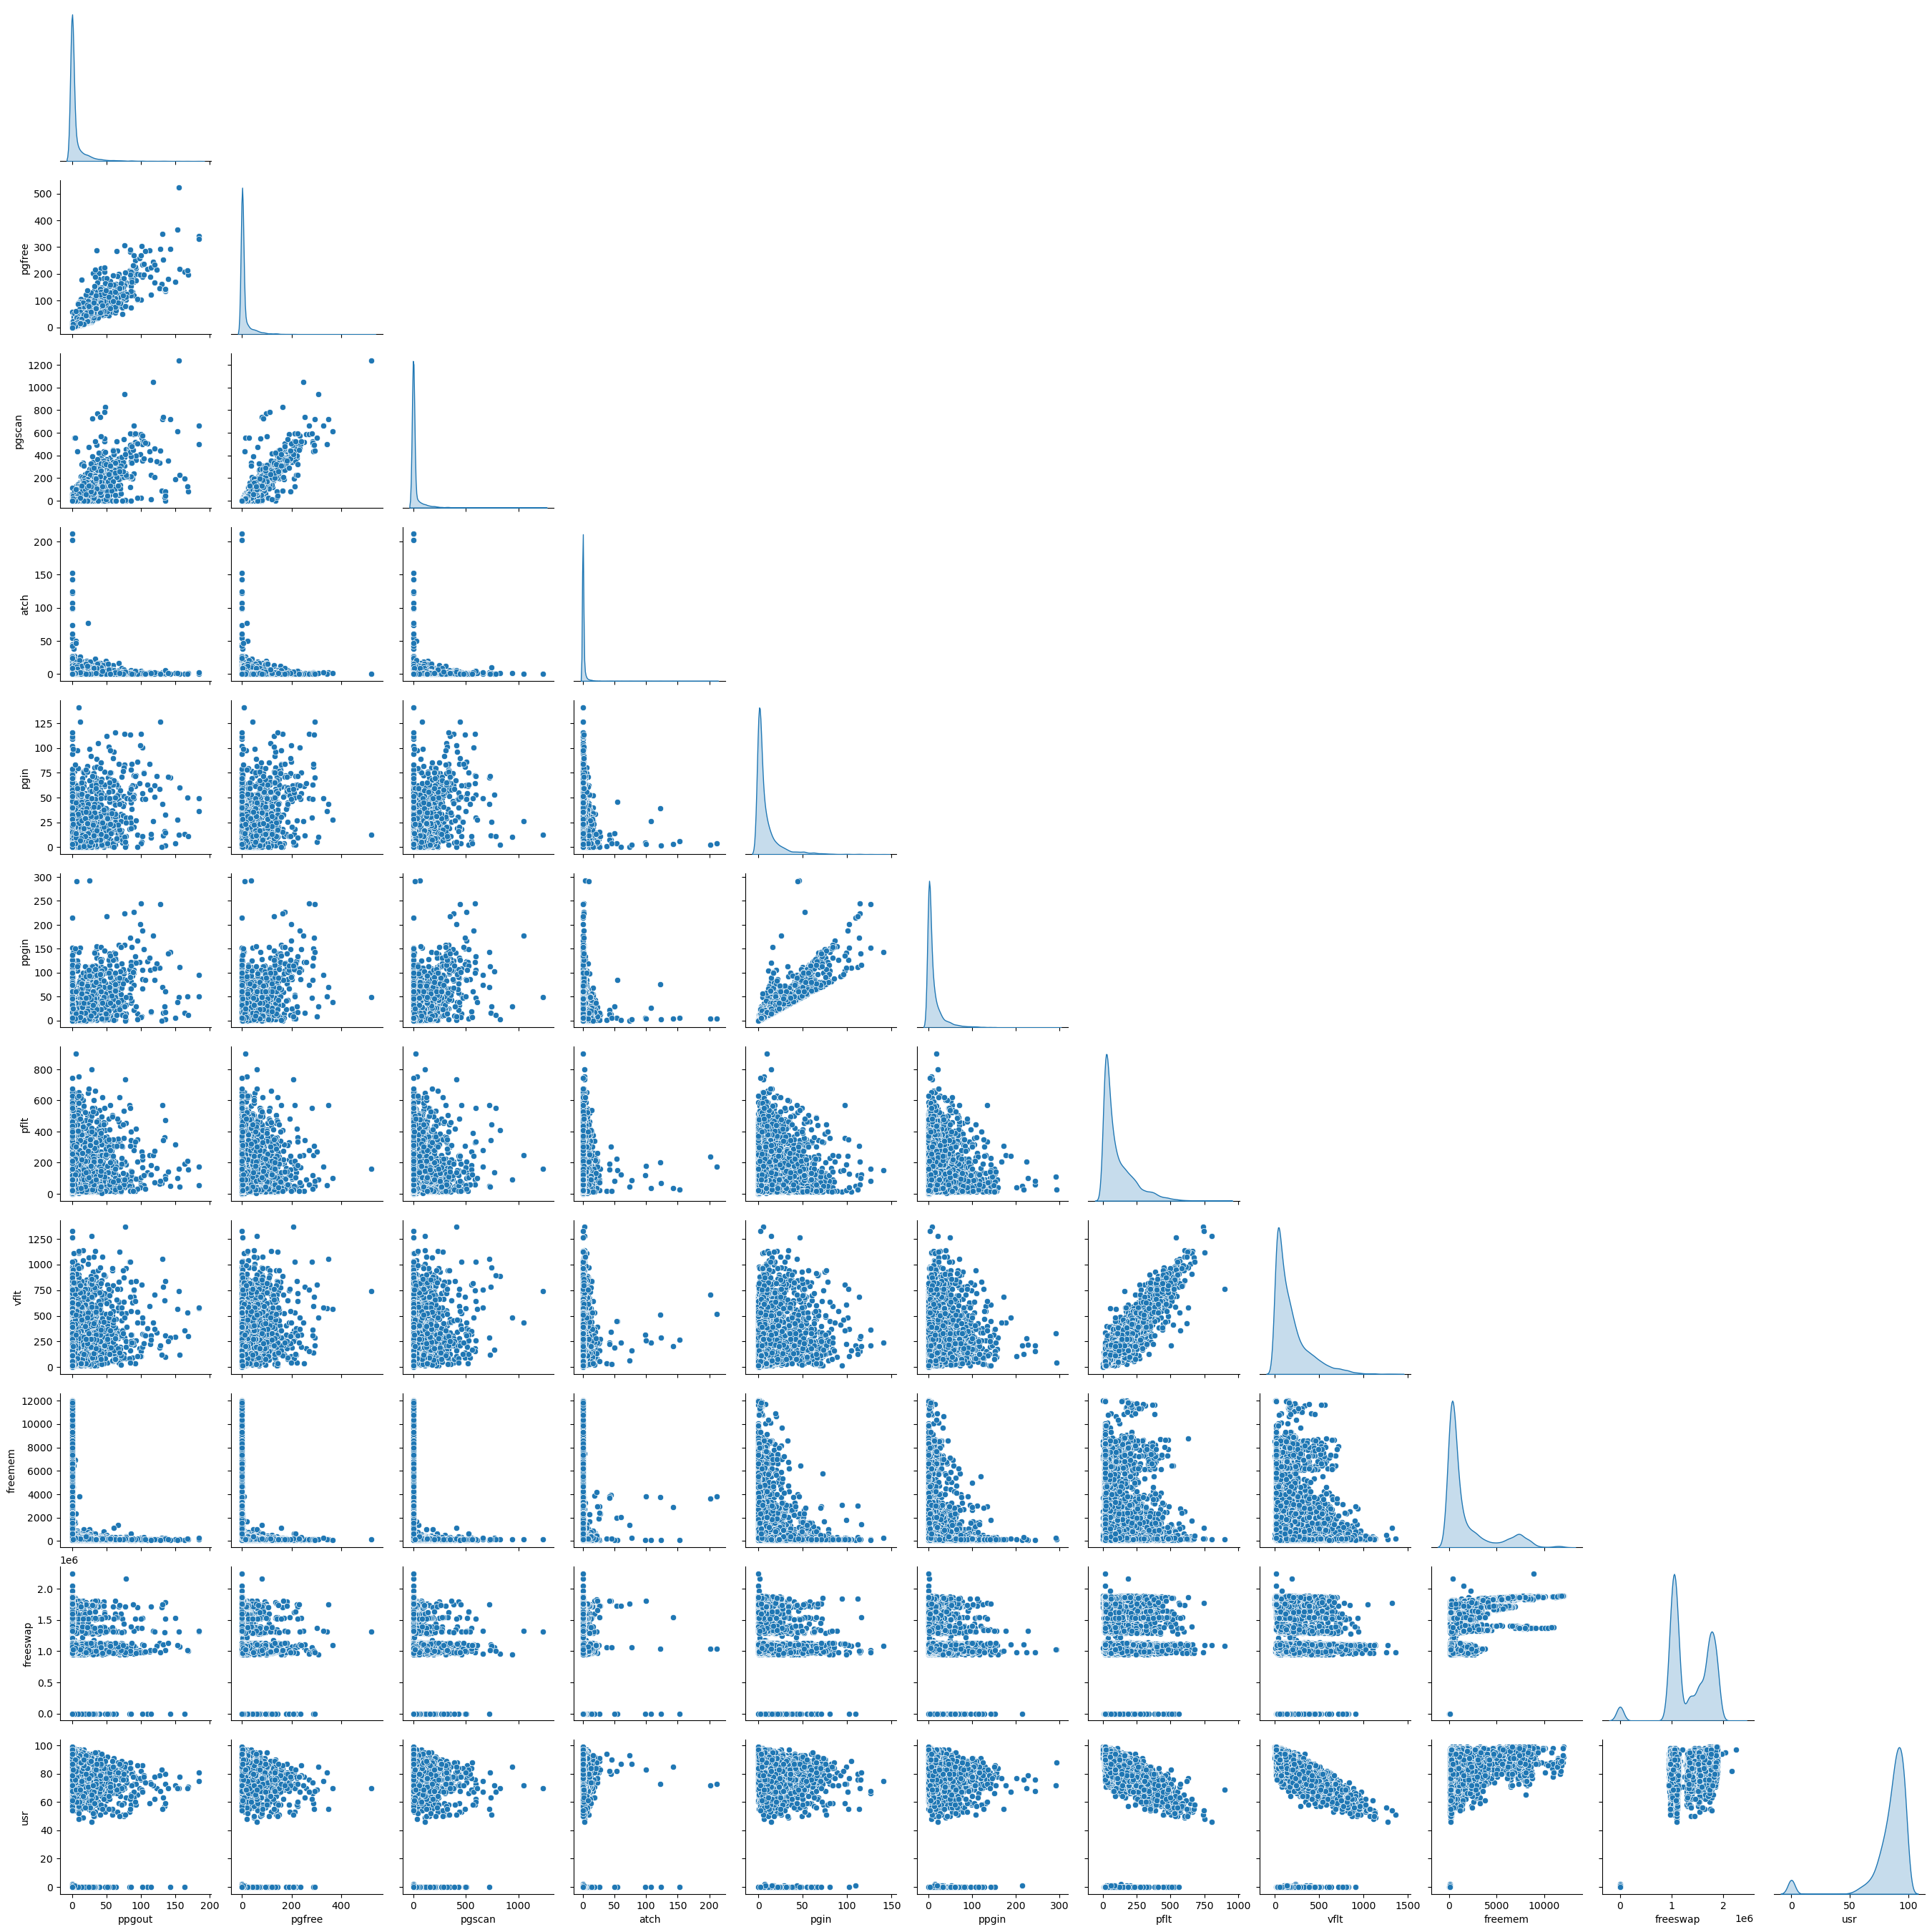

In [12]:
sns.pairplot(comp_num.iloc[:,10:],diag_kind="kde",corner=True);

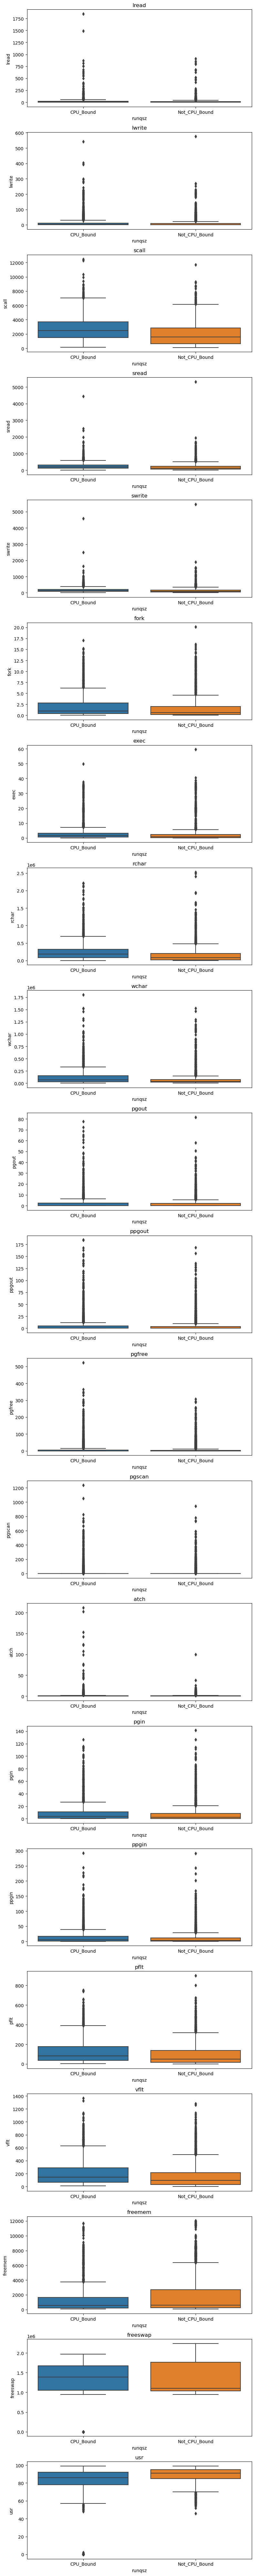

In [13]:
def BoxPlots():
    num = comp_df.select_dtypes(exclude="object").columns
    col = len(num)
    plt.figure(figsize=(8,80))
    for i in range(0,col):
        plt.subplot(21,1,i+1)
        plt.title("{}".format(num[i]))
        sns.boxplot(x=comp_df["runqsz"],y=comp_df[num[i]]);
        plt.tight_layout()
BoxPlots()

#### Observation

* Univariate Analysis:

    - There are a total of 22 variables in the data with 21 numeric variables and 1 categorical variable.
    - The histograms for approximately all of the independent variables are right-skewed.
    - Only the variable *'freeswap'* has a different distribution.
    - Due to similar trends in the data, multicollinearity between the variables can possess a challenge which in turn can effect our linear model
    - The dependent variable usr or portion of time (%) ranges from 0 to 99% with its mean and median values at 84% and 89% respectively.
    - The process run queue size is the only categorical variable in the dataset with 2 categories of systems namely CPU bound and Non-CPU bound. Both categories have almost equal distribution throughout the dataset.

<n><n>

* Bivariate Analysis:
  There are considerable number of features that are highly correlated:

    - *'lwrite'* shows high correlation with *'lread'* (0.85)
    - *'scall'* shows high correlation with *'swrite'* (0.74) and *'sread'* (0.77)
    - *'sread'* shows high correlation with *'swrite'* (0.88)
    - *'fork'* shows very high correlation with *'pfit'* (0.94) and *'vfit'* (0.93) and high correlation with *'exec'*
    - *'exec'* shows high correlation with *'pfit'* (0.73) and *'vfit'* (0.74)
    - *'pgout'* shows very high correlation with *'ppgout'* (0.92), *'pgfree'* (0.82) and average correlation with *'pgscan'* (0.69)
    - *'ppgout'* shows very high correlation with *'pgfree'* (0.94) and *'pgscan'* (0.85)
    - *'ppgout'* shows very high correlation with *'pgfree'* (0.94) and *'pgscan'* (0.85)
    - *'pgfree'* shows extremely high correlation with *'pgscan'* (0.95)
    - *'pgin'* shows extremely high correlation with *'ppgin'* (0.96)
    - *'pfit'* shows very high correlation with *'ppgin'* (0.93)
    - *'pfit'* shows high correlation with *'vfit'* (0.93)

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

### Data Pre-Processing
### 1. Treating null values

In [14]:
comp_df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [15]:
#Imputing the null values with the median values
comp_df["rchar"] = np.where(comp_df["rchar"].isnull()==True,comp_df["rchar"].median(),comp_df["rchar"])
comp_df["wchar"] = np.where(comp_df["wchar"].isnull()==True,comp_df["wchar"].median(),comp_df["wchar"])

In [16]:
comp_df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

<b> All the null values have been treated.

In [17]:
comp_num = comp_df.select_dtypes(exclude="object")
def Zero():
    size = 0
    for i in comp_num.columns:
        a = comp_df[comp_df[i]==0].count()
        size = size + a[1]
    print(size)
Zero()

31775


<b> There are a total of 31,775 zero values present in the dataset. We cannot drop these values as they represent different system activities at different time intervals. At any given point in time, some of these values are bound to be zero as the system is not sending out that information at that time.

### 2. Treating Duplicate Values

In [18]:
comp_df[comp_df.duplicated()]

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr


In [19]:
comp_df = comp_df.drop_duplicates()
comp_df[comp_df.duplicated()]

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr


<b> All the duplicate values have been treated.

### 3. Treating Outliers

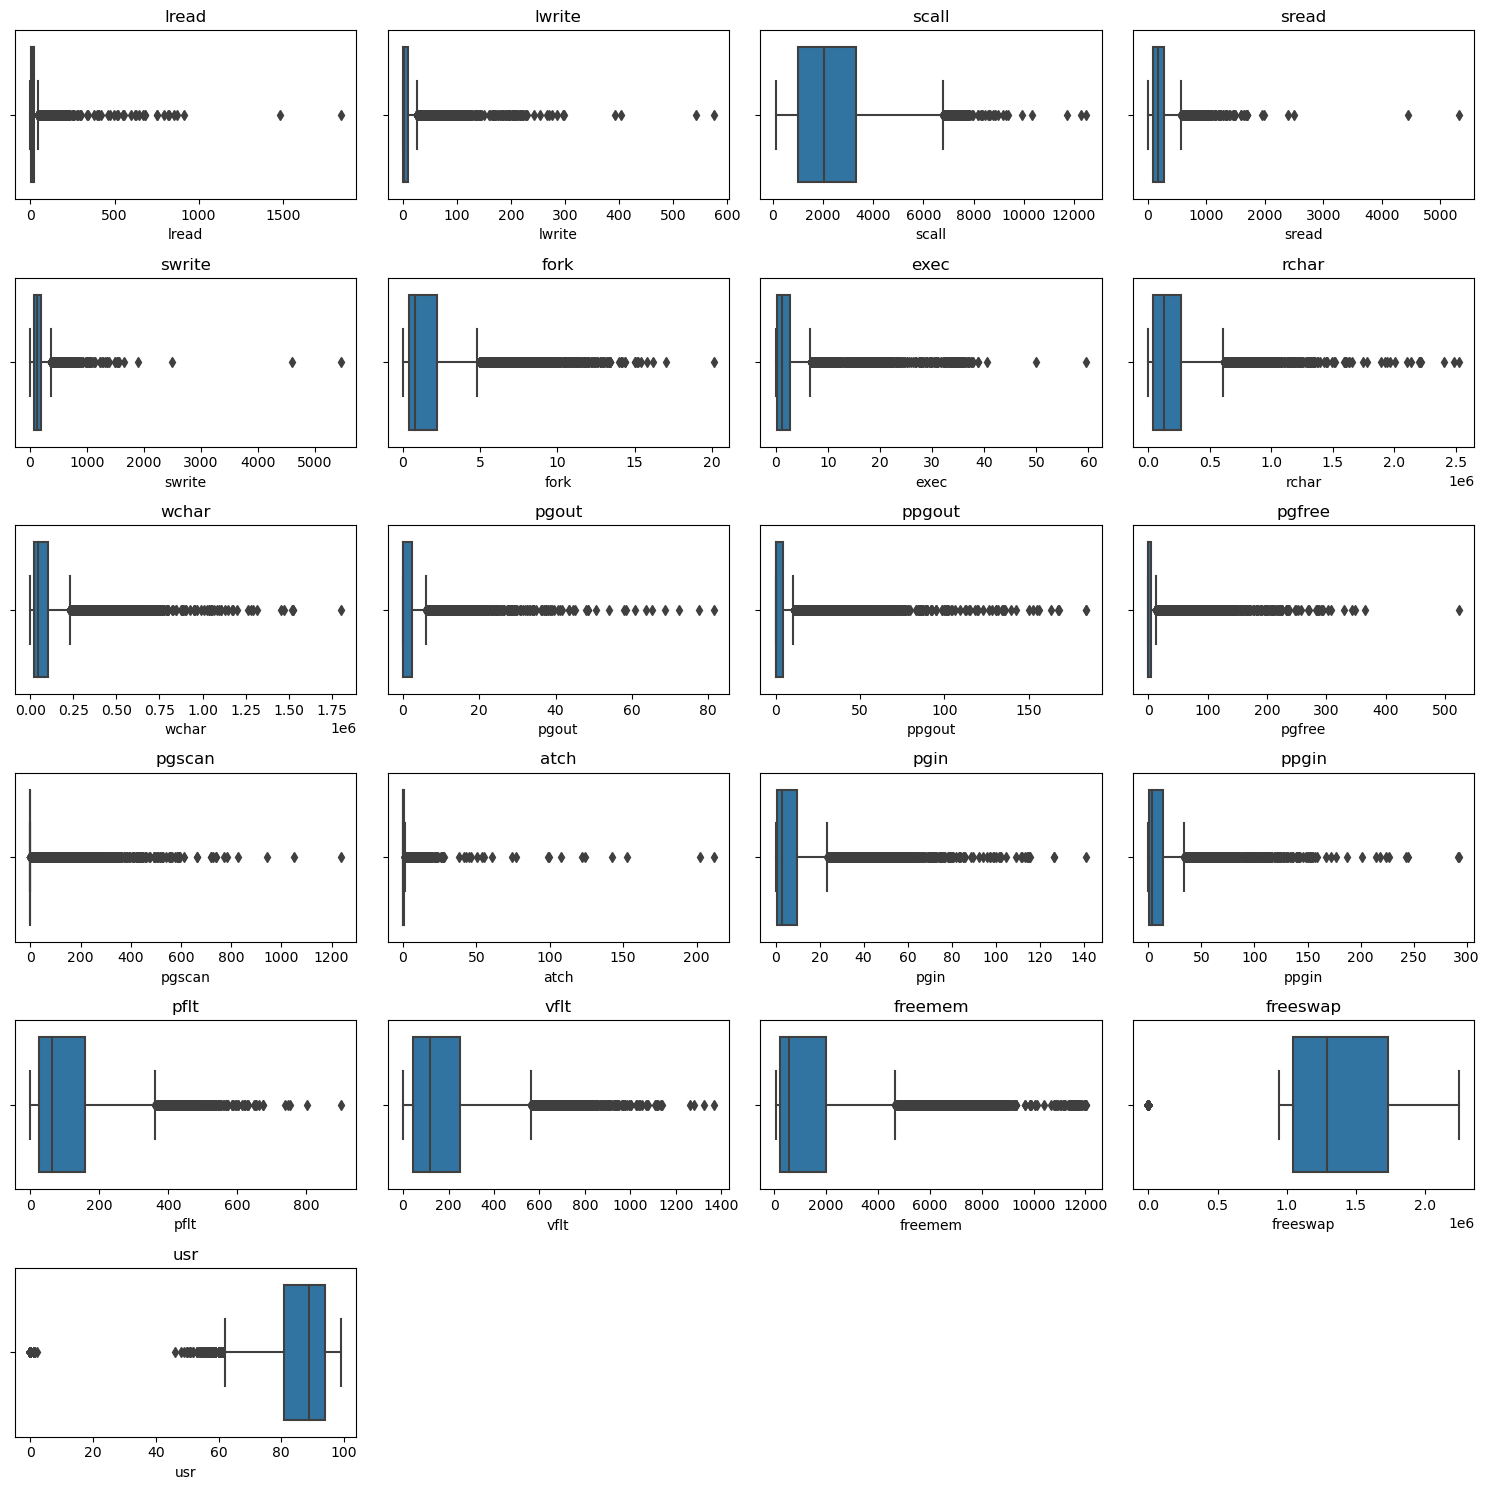

In [20]:
#Visualizing outliers using boxplots
def BoxPlot():
    comp_num = comp_df.select_dtypes(exclude='object').columns
    col = len(comp_num)
    plt.figure(figsize=(15,15))
    for i in range(0,col):
        plt.subplot(6,4,i+1)
        plt.title("{}".format(comp_num[i]))
        sns.boxplot(x = comp_df[comp_num[i]])
        plt.tight_layout()
BoxPlot()

<b> Many outliers can be observed in the dataset and since linear regression is highly sensitive to outliers, we'll have to treat them.

In [21]:
#Calculating the outliers using the IQR method
num = comp_df.select_dtypes(exclude='object')
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3-Q1
upper = 1.5*IQR + Q3
lower = 1.5*IQR - Q1

#Total number of upper and lower outliers in each category
print("IQR Method:\n\n{}".format(((num < lower) | (num > upper)).sum()))

IQR Method:

lread       7259
lwrite      7800
scall       5003
sread       5297
swrite      4699
fork        7090
exec        7464
rchar       7042
wchar       6862
pgout       7526
ppgout      7786
pgfree      7909
pgscan      1744
atch        7688
pgin        7436
ppgin       7450
pflt        6811
vflt        6740
freemem     7534
freeswap       0
usr            0
dtype: int64


In [22]:
#Calculating the outliers using the Min/Max method

upper = num.quantile(0.95)
lower = num.quantile(0.05)

#Total number of upper and lower outliers in each category
print("Min/Max Method:\n\n{}".format(((num < lower) | (num > upper)).sum()))

Min/Max Method:

lread       400
lwrite      404
scall       818
sread       807
swrite      799
fork        421
exec        432
rchar       820
wchar       820
pgout       409
ppgout      410
pgfree      410
pgscan      410
atch        408
pgin        410
ppgin       410
pflt        813
vflt        493
freemem     817
freeswap    820
usr         454
dtype: int64


<b> It can be observed that the number of outliers identified in the IQR method are much more than the Min/Max method. Hence we'll proceed with the Min/Max method for capping our outliers.

In [23]:
#Winsorization
for i in num:
    comp_df[i] = np.where(comp_df[i] < lower[i],lower[i],comp_df[i])
    comp_df[i] = np.where(comp_df[i] > upper[i],upper[i],comp_df[i])

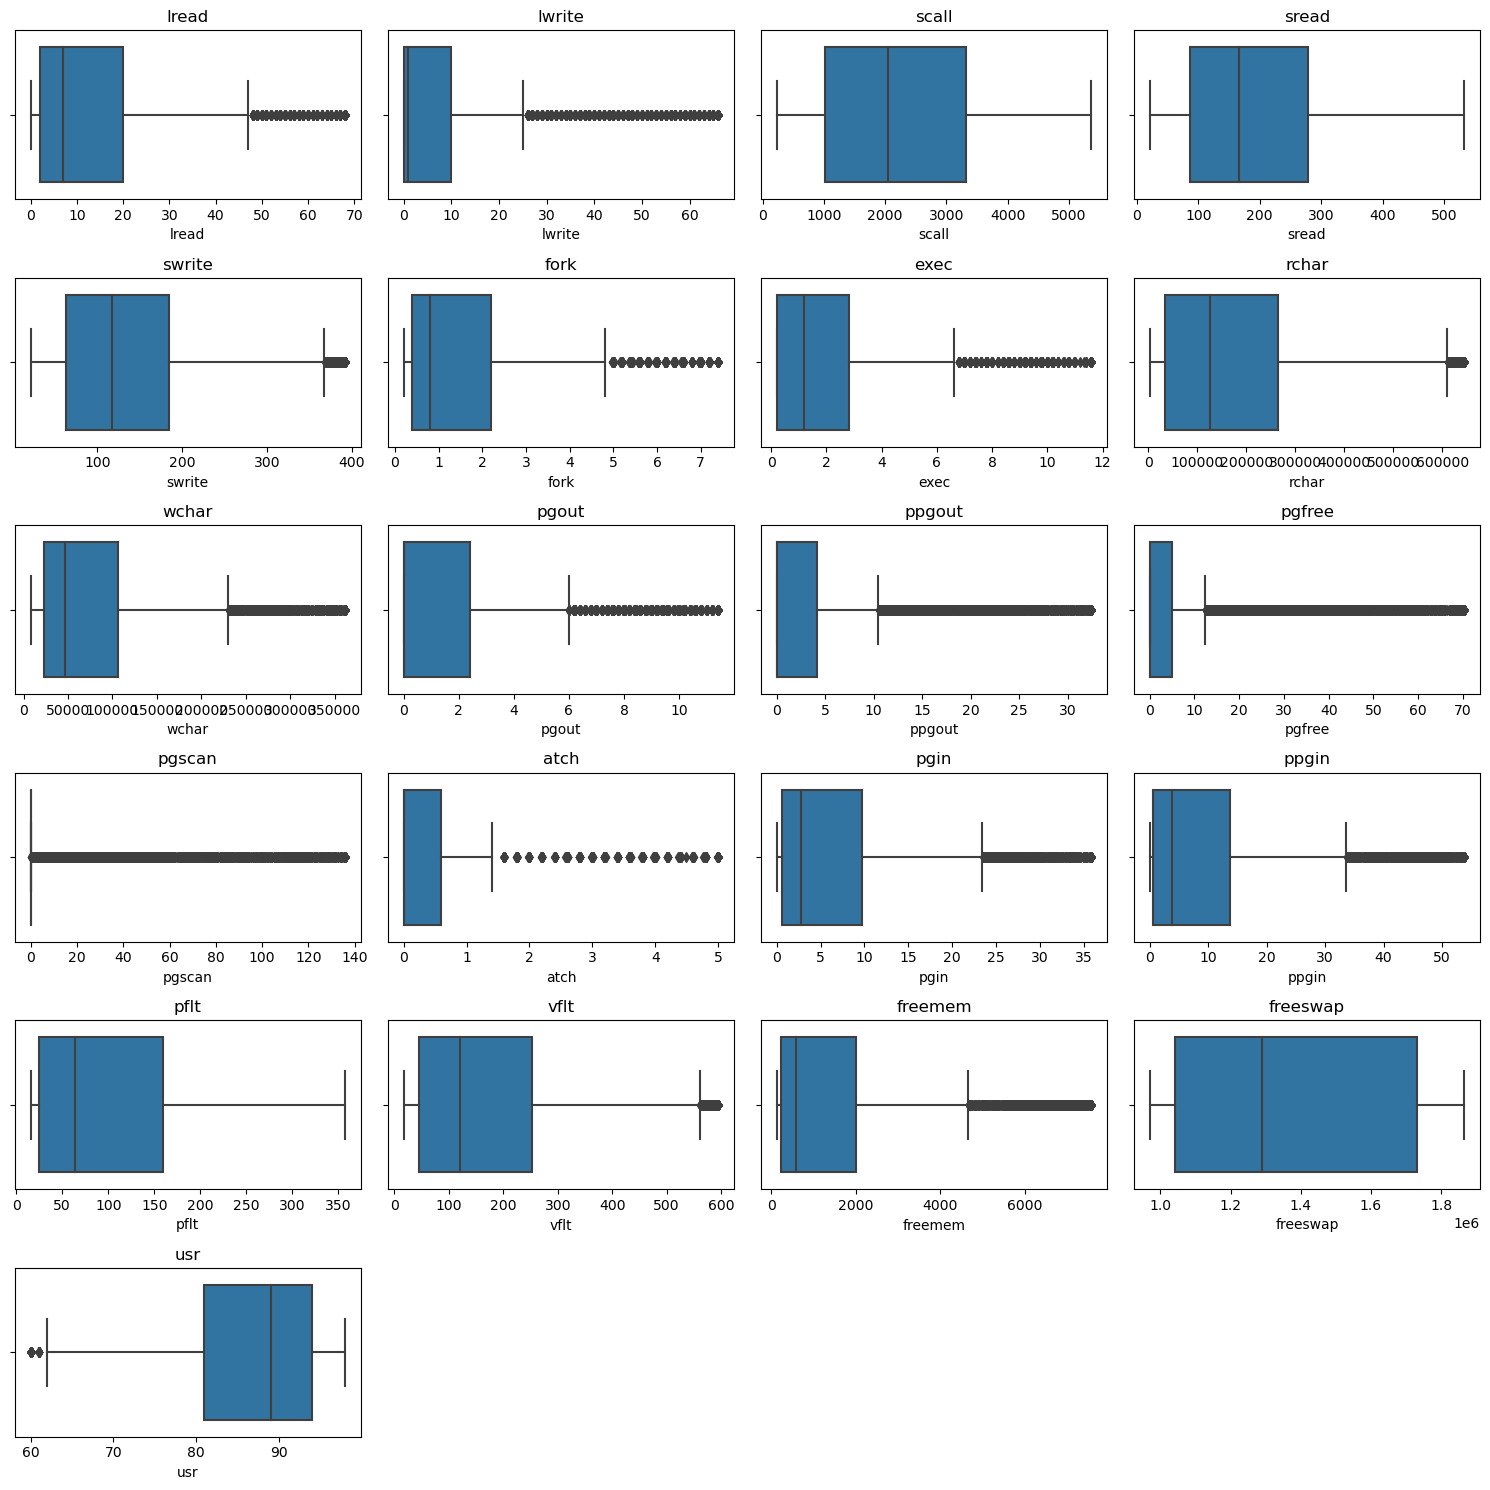

In [24]:
#Visualizing outliers using boxplots
def BoxPlot():
    comp_num = comp_df.select_dtypes(exclude='object').columns
    col = len(comp_num)
    plt.figure(figsize=(15,15))
    for i in range(0,col):
        plt.subplot(6,4,i+1)
        plt.title("{}".format(comp_num[i]))
        sns.boxplot(x = comp_df[comp_num[i]])
        plt.tight_layout()
BoxPlot()

<b> It can be observed that still the dataset comprises of numerous outiers but we won't treat these now as this will result in the deviation of the values of the respective means of the independent variables.

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### Data Encoding
<b> The data comprises of only one categorical variable consisting of two levels namely CPU bound and Not CPU bound. Hence we can proceed by creating dummy variables for this variable.

In [25]:
comp_df = pd.get_dummies(comp_df,columns=["runqsz"])
comp_df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_CPU_Bound,runqsz_Not_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.00,53995.0,0.0,...,0.0,1.6,2.6,16.00,26.40,4670.0,1730946.0,95.0,1,0
1,0.0,0.0,227.0,21.0,21.0,0.2,0.2,3309.05,8385.0,0.0,...,0.0,0.0,0.0,15.63,16.83,7278.0,1865881.3,97.0,0,1
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.50,31950.0,0.0,...,1.2,6.0,9.4,150.20,220.20,702.0,1021237.0,87.0,0,1
3,0.0,0.0,227.0,21.0,21.0,0.2,0.2,125473.50,8670.0,0.0,...,0.0,0.2,0.2,15.60,16.80,7248.0,1863704.0,98.0,0,1
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.50,12185.0,0.0,...,0.0,1.0,1.2,37.80,47.60,633.0,1760253.0,90.0,0,1


In [26]:
#Dropping the Not CPU Bound column
comp_df.drop("runqsz_Not_CPU_Bound",axis=1,inplace=True)
comp_df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.00,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4670.0,1730946.0,95.0,1
1,0.0,0.0,227.0,21.0,21.0,0.2,0.2,3309.05,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,7278.0,1865881.3,97.0,0
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.50,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702.0,1021237.0,87.0,0
3,0.0,0.0,227.0,21.0,21.0,0.2,0.2,125473.50,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,7248.0,1863704.0,98.0,0
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.50,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633.0,1760253.0,90.0,0


In [27]:
comp_df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.00,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4670.0,1730946.0,95.0,1
1,0.0,0.0,227.0,21.0,21.0,0.2,0.2,3309.05,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,7278.0,1865881.3,97.0,0
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.50,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702.0,1021237.0,87.0,0
3,0.0,0.0,227.0,21.0,21.0,0.2,0.2,125473.50,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,7248.0,1863704.0,98.0,0
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.50,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633.0,1760253.0,90.0,0


In [28]:
#Splitting the data into dependent and independent variables
X = comp_df.drop("usr",axis=1)
y = comp_df["usr"]

#Adding intercept to the data
X = sm.add_constant(X)

#Splititng the data into training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,train_size=0.7)

In [29]:
## Fitting the Linear Model

model = sm.OLS(y_train, X_train)
predict = model.fit()
original_rsquared = predict.rsquared
original_rsquared_adj = predict.rsquared_adj
# Printing the regression summary
print(predict.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     607.5
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:04:23   Log-Likelihood:                -17988.
No. Observations:                5734   AIC:                         3.602e+04
Df Residuals:                    5712   BIC:                         3.617e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               91.0386      0.485  

### Interpretation of R-squared and p-values

* The R-squared value tells us that our model can explain 69.1% of the variance in the training set.
* The p-values (P>|t|) are mostly low for all the predictors however, due to the presence of high multicollinearity in our data, the p-values are bound to be different.
* Hence we need to ensure that there is no multicollinearity in order to interpret the p-values.

### Checking for Multicollinearity using VIF

* It was observed earlier that there was significant correlation existing amongst some of the variables in the data.
* Multicollinearity must be dealt with in order to ensure the correct p-values of the predictors which in turn would help increase our model's overall efficiency.
* We will detect the multicollinearity among the variables using the <b> Variance Inflation Factor (VIF) </b>

In [30]:
# Checking the VIF of the predictors

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(np.round(vif_series1.sort_values(ascending=False),3)))

VIF values: 

const               43.254
pgfree              33.808
ppgout              23.783
vflt                17.125
fork                15.064
ppgin               13.754
pgscan              13.568
pgin                13.046
pflt                10.770
pgout                8.984
sread                6.753
lread                6.185
swrite               5.888
lwrite               5.136
exec                 3.246
scall                3.172
freeswap             2.287
rchar                2.237
freemem              1.977
wchar                1.665
atch                 1.650
runqsz_CPU_Bound     1.212
dtype: float64



* It can be clearly indicated from the high VIF values that many features in our dataset are correlated with each other.

* We can trust the p-values of the predictors with low VIF values in the range of 5-10 as the multicolinearity only affects the correlated variables.

* To treat multicollinearity, we will have to drop one or more of the correlated features.

* We will drop the variable that has the least impact on the adjusted R-squared of the model.

<b> We'll start by removing the variable with the high VIF values and therafter observe the consequent effect on our moodel.

In [31]:
#Creating a series of predictors with high VIF values
high_vif_series = vif_series1[vif_series1>5]
high_vif_series.drop("const",axis=0,inplace=True)
high_vif_series

lread      6.185115
lwrite     5.135652
sread      6.753225
swrite     5.887745
fork      15.063613
pgout      8.984055
ppgout    23.782715
pgfree    33.807822
pgscan    13.568154
pgin      13.046256
ppgin     13.754359
pflt      10.770155
vflt      17.125337
dtype: float64

<b> Creating a loop to drop the predictors with high VIF values one-by one and checking the R<sup>2</sup> values therafter.

In [32]:
for i in high_vif_series.sort_values(ascending=False).index:
    X_train1 = X_train.drop([i], axis=1)
    model_1 = sm.OLS(y_train, X_train1)
    predict_1 = model_1.fit()
    print("Values when dropping {}:\nR-squared: {}\nAdjusted R-squared: {}\n\n".format(i,np.round(predict_1.rsquared,3),np.round(predict_1.rsquared_adj,3)))

Values when dropping pgfree:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping ppgout:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping vflt:
R-squared: 0.689
Adjusted R-squared: 0.688


Values when dropping fork:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping ppgin:
R-squared: 0.691
Adjusted R-squared: 0.69


Values when dropping pgscan:
R-squared: 0.691
Adjusted R-squared: 0.69


Values when dropping pgin:
R-squared: 0.691
Adjusted R-squared: 0.69


Values when dropping pflt:
R-squared: 0.688
Adjusted R-squared: 0.687


Values when dropping pgout:
R-squared: 0.689
Adjusted R-squared: 0.687


Values when dropping sread:
R-squared: 0.691
Adjusted R-squared: 0.69


Values when dropping lread:
R-squared: 0.688
Adjusted R-squared: 0.687


Values when dropping swrite:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping lwrite:
R-squared: 0.69
Adjusted R-squared: 0.689




In [33]:
print("Original R-Squared: ",np.round(original_rsquared,3),"\nOriginal Adjusted R-Squared: ",np.round(original_rsquared_adj,3))

Original R-Squared:  0.691 
Original Adjusted R-Squared:  0.69


In [34]:
high_vif_series.sort_values(ascending=False)

pgfree    33.807822
ppgout    23.782715
vflt      17.125337
fork      15.063613
ppgin     13.754359
pgscan    13.568154
pgin      13.046256
pflt      10.770155
pgout      8.984055
sread      6.753225
lread      6.185115
swrite     5.887745
lwrite     5.135652
dtype: float64

<b> It can be noted that there is no major change in the value of R-Square when dropping the high VIF predictors. We will proceed by dropping the '*pgfree*' variable as it has the highest VIF value and dropping it results in no change in the R-Squared values.

In [35]:
#Dropping the 'pgfree' variable and observing the results therafter
X_train = X_train.drop("pgfree",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()
r_squared = predict1.rsquared
r_squared_adj = predict1.rsquared_adj
print(predict1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     636.9
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:04:23   Log-Likelihood:                -17992.
No. Observations:                5734   AIC:                         3.603e+04
Df Residuals:                    5713   BIC:                         3.616e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               91.1029      0.485  

In [36]:
# Checking the VIF to see if multicolinearity is still present

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(np.round(vif_series2.sort_values(ascending=False),3)))

VIF values: 

const               43.141
vflt                17.066
ppgout              15.055
fork                15.046
ppgin               13.734
pgin                13.034
pflt                10.770
pgout                8.984
sread                6.753
lread                6.185
swrite               5.888
lwrite               5.135
pgscan               4.815
exec                 3.246
scall                3.169
freeswap             2.281
rchar                2.232
freemem              1.974
wchar                1.659
atch                 1.650
runqsz_CPU_Bound     1.212
dtype: float64



* Still it can be observed that many variables have high VIF values.
* We'll repeat the same process of checking the R-squared values by dropping the predictors with high VIF values one-by-one.

In [37]:
#Creating a series of predictors with high VIF values
high_vif_series2 = vif_series2[vif_series2>5]
high_vif_series2.drop("const",axis=0,inplace=True)
high_vif_series2

lread      6.184694
lwrite     5.135326
sread      6.753014
swrite     5.887633
fork      15.046344
pgout      8.983917
ppgout    15.055352
pgin      13.033966
ppgin     13.734284
pflt      10.769647
vflt      17.066405
dtype: float64

In [38]:
for i in high_vif_series2.sort_values(ascending=False).index:
    X_train2 = X_train.drop([i], axis=1)
    model_2 = sm.OLS(y_train, X_train2)
    predict_2 = model_2.fit()
    print("Values when dropping {}:\nR-squared: {}\nAdjusted R-squared: {}\n\n".format(i,np.round(predict_2.rsquared,3),np.round(predict_2.rsquared_adj,3)))

Values when dropping vflt:
R-squared: 0.689
Adjusted R-squared: 0.687


Values when dropping ppgout:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping fork:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping ppgin:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping pgin:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping pflt:
R-squared: 0.688
Adjusted R-squared: 0.687


Values when dropping pgout:
R-squared: 0.688
Adjusted R-squared: 0.687


Values when dropping sread:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping lread:
R-squared: 0.688
Adjusted R-squared: 0.687


Values when dropping swrite:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping lwrite:
R-squared: 0.689
Adjusted R-squared: 0.688




In [39]:
print("Original R-Squared: ",np.round(r_squared,3),"\nOriginal Adjusted R-Squared: ",np.round(r_squared_adj,3))

Original R-Squared:  0.69 
Original Adjusted R-Squared:  0.689


In [40]:
high_vif_series2.sort_values(ascending=False)

vflt      17.066405
ppgout    15.055352
fork      15.046344
ppgin     13.734284
pgin      13.033966
pflt      10.769647
pgout      8.983917
sread      6.753014
lread      6.184694
swrite     5.887633
lwrite     5.135326
dtype: float64

<b> It can be noted that there is no major change in the value of R-Square when dropping the high VIF predictors. We will proceed by dropping the '*ppgout*' variable as it has a high VIF value and dropping it results in no change in the R-Squared values.

In [41]:
#Dropping the 'vflt' variable and observing the results therafter
X_train = X_train.drop("ppgout",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()
r_squared = predict1.rsquared
r_squared_adj = predict1.rsquared_adj
print(predict1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     668.2
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:04:23   Log-Likelihood:                -17998.
No. Observations:                5734   AIC:                         3.604e+04
Df Residuals:                    5714   BIC:                         3.617e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               90.9611      0.484  

In [42]:
# Checking the VIF to see if multicolinearity is still present

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(np.round(vif_series2.sort_values(ascending=False),3)))

VIF values: 

const               42.871
vflt                17.048
fork                15.039
ppgin               13.706
pgin                13.030
pflt                10.769
sread                6.752
lread                6.146
swrite               5.885
lwrite               5.121
exec                 3.245
scall                3.169
pgout                2.771
pgscan               2.385
freeswap             2.273
rchar                2.232
freemem              1.974
wchar                1.651
atch                 1.642
runqsz_CPU_Bound     1.212
dtype: float64



* Still it can be observed that many variables have high VIF values.
* We'll repeat the same process of checking the R-squared values by dropping the predictors with high VIF values one-by-one.

In [43]:
#Creating a series of predictors with high VIF values
high_vif_series2 = vif_series2[vif_series2>5]
high_vif_series2.drop("const",axis=0,inplace=True)
high_vif_series2

lread      6.146074
lwrite     5.121102
sread      6.752014
swrite     5.885058
fork      15.038538
pgin      13.029707
ppgin     13.705977
pflt      10.769197
vflt      17.047621
dtype: float64

In [44]:
for i in high_vif_series2.sort_values(ascending=False).index:
    X_train2 = X_train.drop([i], axis=1)
    model_2 = sm.OLS(y_train, X_train2)
    predict_2 = model_2.fit()
    print("Values when dropping {}:\nR-squared: {}\nAdjusted R-squared: {}\n\n".format(i,np.round(predict_2.rsquared,3),np.round(predict_2.rsquared_adj,3)))

Values when dropping vflt:
R-squared: 0.688
Adjusted R-squared: 0.687


Values when dropping fork:
R-squared: 0.689
Adjusted R-squared: 0.688


Values when dropping ppgin:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping pgin:
R-squared: 0.689
Adjusted R-squared: 0.689


Values when dropping pflt:
R-squared: 0.687
Adjusted R-squared: 0.686


Values when dropping sread:
R-squared: 0.69
Adjusted R-squared: 0.689


Values when dropping lread:
R-squared: 0.687
Adjusted R-squared: 0.686


Values when dropping swrite:
R-squared: 0.689
Adjusted R-squared: 0.688


Values when dropping lwrite:
R-squared: 0.689
Adjusted R-squared: 0.688




In [45]:
print("Original R-Squared: ",np.round(r_squared,3),"\nOriginal Adjusted R-Squared: ",np.round(r_squared_adj,3))

Original R-Squared:  0.69 
Original Adjusted R-Squared:  0.689


In [46]:
high_vif_series2.sort_values(ascending=False)

vflt      17.047621
fork      15.038538
ppgin     13.705977
pgin      13.029707
pflt      10.769197
sread      6.752014
lread      6.146074
swrite     5.885058
lwrite     5.121102
dtype: float64

In [47]:
#Dropping the 'ppgin' variable and observing the results therafter
X_train = X_train.drop("ppgin",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()
r_squared = predict1.rsquared
r_squared_adj = predict1.rsquared_adj

# Checking the VIF to see if multicolinearity is still present

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(np.round(vif_series2.sort_values(ascending=False),3)))

VIF values: 

const               42.750
vflt                17.041
fork                15.026
pflt                10.766
sread                6.749
lread                6.105
swrite               5.879
lwrite               5.106
exec                 3.245
scall                3.166
pgout                2.771
pgscan               2.291
freeswap             2.267
rchar                2.193
freemem              1.974
pgin                 1.844
wchar                1.649
atch                 1.640
runqsz_CPU_Bound     1.210
dtype: float64



In [48]:
for i in vif_series2.sort_values(ascending=False).index:
    X_train2 = X_train.drop([i], axis=1)
    model_2 = sm.OLS(y_train, X_train2)
    predict_2 = model_2.fit()
    print("Values when dropping {}:\nR-squared: {}\nAdjusted R-squared: {}\n\n".format(i,np.round(predict_2.rsquared,3),np.round(predict_2.rsquared_adj,3)))

Values when dropping const:
R-squared: 0.97
Adjusted R-squared: 0.97


Values when dropping vflt:
R-squared: 0.688
Adjusted R-squared: 0.687


Values when dropping fork:
R-squared: 0.689
Adjusted R-squared: 0.688


Values when dropping pflt:
R-squared: 0.687
Adjusted R-squared: 0.686


Values when dropping sread:
R-squared: 0.689
Adjusted R-squared: 0.689


Values when dropping lread:
R-squared: 0.687
Adjusted R-squared: 0.686


Values when dropping swrite:
R-squared: 0.689
Adjusted R-squared: 0.688


Values when dropping lwrite:
R-squared: 0.689
Adjusted R-squared: 0.688


Values when dropping exec:
R-squared: 0.686
Adjusted R-squared: 0.685


Values when dropping scall:
R-squared: 0.688
Adjusted R-squared: 0.687


Values when dropping pgout:
R-squared: 0.688
Adjusted R-squared: 0.687


Values when dropping pgscan:
R-squared: 0.689
Adjusted R-squared: 0.688


Values when dropping freeswap:
R-squared: 0.679
Adjusted R-squared: 0.678


Values when dropping rchar:
R-squared: 0.686
Adjust

In [49]:
print("Original R-Squared: ",np.round(r_squared,3),"\nOriginal Adjusted R-Squared: ",np.round(r_squared_adj,3))

Original R-Squared:  0.69 
Original Adjusted R-Squared:  0.689


In [50]:
vif_series2.sort_values(ascending=False)

const               42.749842
vflt                17.040605
fork                15.025611
pflt                10.765690
sread                6.748652
lread                6.104587
swrite               5.878913
lwrite               5.106136
exec                 3.244831
scall                3.166028
pgout                2.770515
pgscan               2.290932
freeswap             2.267332
rchar                2.193167
freemem              1.974146
pgin                 1.844484
wchar                1.649400
atch                 1.640101
runqsz_CPU_Bound     1.210392
dtype: float64

<b> It can be noted that still there are no major changes in the values of R-Square when dropping the high VIF predictors. We will proceed by dropping the '*vflt*' variable as it has the highest VIF value and dropping it results in no change in the original R-Squared value.

In [51]:
#Dropping the 'ppgin' variable and observing the results therafter
X_train = X_train.drop("vflt",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()
r_squared = predict1.rsquared
r_squared_adj = predict1.rsquared_adj

# Checking the VIF to see if multicolinearity is still present

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(np.round(vif_series2.sort_values(ascending=False),3)))

VIF values: 

const               40.336
fork                10.626
pflt                 8.409
sread                6.677
lread                6.089
swrite               5.857
lwrite               5.105
exec                 3.244
scall                3.155
pgout                2.768
pgscan               2.243
rchar                2.190
freeswap             2.138
freemem              1.967
pgin                 1.696
wchar                1.643
atch                 1.626
runqsz_CPU_Bound     1.209
dtype: float64



In [52]:
for i in vif_series2.sort_values(ascending=False).index:
    X_train2 = X_train.drop([i], axis=1)
    model_2 = sm.OLS(y_train, X_train2)
    predict_2 = model_2.fit()
    print("Values when dropping {}:\nR-squared: {}\nAdjusted R-squared: {}\n\n".format(i,np.round(predict_2.rsquared,3),np.round(predict_2.rsquared_adj,3)))

Values when dropping const:
R-squared: 0.969
Adjusted R-squared: 0.969


Values when dropping fork:
R-squared: 0.685
Adjusted R-squared: 0.685


Values when dropping pflt:
R-squared: 0.681
Adjusted R-squared: 0.681


Values when dropping sread:
R-squared: 0.687
Adjusted R-squared: 0.687


Values when dropping lread:
R-squared: 0.685
Adjusted R-squared: 0.684


Values when dropping swrite:
R-squared: 0.687
Adjusted R-squared: 0.686


Values when dropping lwrite:
R-squared: 0.687
Adjusted R-squared: 0.686


Values when dropping exec:
R-squared: 0.684
Adjusted R-squared: 0.683


Values when dropping scall:
R-squared: 0.686
Adjusted R-squared: 0.685


Values when dropping pgout:
R-squared: 0.686
Adjusted R-squared: 0.685


Values when dropping pgscan:
R-squared: 0.688
Adjusted R-squared: 0.687


Values when dropping rchar:
R-squared: 0.684
Adjusted R-squared: 0.683


Values when dropping freeswap:
R-squared: 0.675
Adjusted R-squared: 0.674


Values when dropping freemem:
R-squared: 0.687
A

In [53]:
print("Original R-Squared: ",np.round(r_squared,3),"\nOriginal Adjusted R-Squared: ",np.round(r_squared_adj,3))

Original R-Squared:  0.688 
Original Adjusted R-Squared:  0.687


In [54]:
vif_series2.sort_values(ascending=False)

const               40.335899
fork                10.626031
pflt                 8.408592
sread                6.676675
lread                6.089163
swrite               5.856863
lwrite               5.105171
exec                 3.243590
scall                3.154501
pgout                2.768167
pgscan               2.243137
rchar                2.189752
freeswap             2.138473
freemem              1.967041
pgin                 1.695673
wchar                1.643209
atch                 1.626126
runqsz_CPU_Bound     1.208747
dtype: float64

<b> It can be noted that still there are no major changes in the values of R-Square when dropping the high VIF predictors. We will proceed by dropping the '*fork*' variable as it has the 2nd highest VIF value and dropping it results in no change in the original R-Squared value.

In [55]:
#Dropping the 'fork' variable and observing the results therafter
X_train = X_train.drop("fork",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()
r_squared = predict1.rsquared
r_squared_adj = predict1.rsquared_adj

# Checking the VIF to see if multicolinearity is still present

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(np.round(vif_series2.sort_values(ascending=False),3)))

VIF values: 

const               39.810
sread                6.675
lread                6.038
swrite               5.456
lwrite               5.045
pflt                 3.232
scall                3.068
pgout                2.768
exec                 2.613
pgscan               2.243
rchar                2.189
freeswap             2.136
freemem              1.965
pgin                 1.691
atch                 1.622
wchar                1.605
runqsz_CPU_Bound     1.207
dtype: float64



In [56]:
for i in vif_series2.sort_values(ascending=False).index:
    X_train2 = X_train.drop([i], axis=1)
    model_2 = sm.OLS(y_train, X_train2)
    predict_2 = model_2.fit()
    print("Values when dropping {}:\nR-squared: {}\nAdjusted R-squared: {}\n\n".format(i,np.round(predict_2.rsquared,3),np.round(predict_2.rsquared_adj,3)))

Values when dropping const:
R-squared: 0.968
Adjusted R-squared: 0.968


Values when dropping sread:
R-squared: 0.685
Adjusted R-squared: 0.685


Values when dropping lread:
R-squared: 0.682
Adjusted R-squared: 0.681


Values when dropping swrite:
R-squared: 0.684
Adjusted R-squared: 0.683


Values when dropping lwrite:
R-squared: 0.684
Adjusted R-squared: 0.683


Values when dropping pflt:
R-squared: 0.651
Adjusted R-squared: 0.65


Values when dropping scall:
R-squared: 0.684
Adjusted R-squared: 0.684


Values when dropping pgout:
R-squared: 0.684
Adjusted R-squared: 0.683


Values when dropping exec:
R-squared: 0.678
Adjusted R-squared: 0.677


Values when dropping pgscan:
R-squared: 0.685
Adjusted R-squared: 0.685


Values when dropping rchar:
R-squared: 0.682
Adjusted R-squared: 0.681


Values when dropping freeswap:
R-squared: 0.673
Adjusted R-squared: 0.672


Values when dropping freemem:
R-squared: 0.685
Adjusted R-squared: 0.685


Values when dropping pgin:
R-squared: 0.68
Adj

In [57]:
print("Original R-Squared: ",np.round(r_squared,3),"\nOriginal Adjusted R-Squared: ",np.round(r_squared_adj,3))

Original R-Squared:  0.685 
Original Adjusted R-Squared:  0.685


In [58]:
vif_series2.sort_values(ascending=False)

const               39.809720
sread                6.675472
lread                6.038180
swrite               5.455700
lwrite               5.045472
pflt                 3.231722
scall                3.068268
pgout                2.767982
exec                 2.613376
pgscan               2.242679
rchar                2.188695
freeswap             2.135859
freemem              1.965245
pgin                 1.691142
atch                 1.621960
wchar                1.604777
runqsz_CPU_Bound     1.206611
dtype: float64

<b> It can be noted that still there are no major changes in the values of R-Square when dropping the high VIF predictors. We will proceed by dropping the '*sread*' variable as it has the 2nd highest VIF value and dropping it results in no change in the original R-Squared value.

In [59]:
#Dropping the 'sread' variable and observing the results therafter
X_train = X_train.drop("sread",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()
r_squared = predict1.rsquared
r_squared_adj = predict1.rsquared_adj

# Checking the VIF to see if multicolinearity is still present

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(np.round(vif_series2.sort_values(ascending=False),3)))

VIF values: 

const               39.451
lread                6.035
lwrite               5.041
pflt                 3.215
swrite               3.032
scall                2.769
pgout                2.768
exec                 2.607
pgscan               2.240
freeswap             2.113
freemem              1.965
rchar                1.770
pgin                 1.688
atch                 1.620
wchar                1.593
runqsz_CPU_Bound     1.207
dtype: float64



In [60]:
for i in vif_series2.sort_values(ascending=False).index:
    X_train2 = X_train.drop([i], axis=1)
    model_2 = sm.OLS(y_train, X_train2)
    predict_2 = model_2.fit()
    print("Values when dropping {}:\nR-squared: {}\nAdjusted R-squared: {}\n\n".format(i,np.round(predict_2.rsquared,3),np.round(predict_2.rsquared_adj,3)))

Values when dropping const:
R-squared: 0.968
Adjusted R-squared: 0.968


Values when dropping lread:
R-squared: 0.682
Adjusted R-squared: 0.681


Values when dropping lwrite:
R-squared: 0.684
Adjusted R-squared: 0.683


Values when dropping pflt:
R-squared: 0.651
Adjusted R-squared: 0.65


Values when dropping swrite:
R-squared: 0.682
Adjusted R-squared: 0.681


Values when dropping scall:
R-squared: 0.684
Adjusted R-squared: 0.683


Values when dropping pgout:
R-squared: 0.683
Adjusted R-squared: 0.683


Values when dropping exec:
R-squared: 0.678
Adjusted R-squared: 0.677


Values when dropping pgscan:
R-squared: 0.685
Adjusted R-squared: 0.685


Values when dropping freeswap:
R-squared: 0.672
Adjusted R-squared: 0.671


Values when dropping freemem:
R-squared: 0.685
Adjusted R-squared: 0.684


Values when dropping rchar:
R-squared: 0.68
Adjusted R-squared: 0.679


Values when dropping pgin:
R-squared: 0.68
Adjusted R-squared: 0.679


Values when dropping atch:
R-squared: 0.685
Adjus

In [61]:
print("Original R-Squared: ",np.round(r_squared,3),"\nOriginal Adjusted R-Squared: ",np.round(r_squared_adj,3))

Original R-Squared:  0.685 
Original Adjusted R-Squared:  0.685


In [62]:
vif_series2.sort_values(ascending=False)

const               39.451449
lread                6.035190
lwrite               5.040742
pflt                 3.215131
swrite               3.032121
scall                2.768736
pgout                2.767679
exec                 2.607482
pgscan               2.239828
freeswap             2.113289
freemem              1.964670
rchar                1.769620
pgin                 1.688106
atch                 1.619730
wchar                1.593242
runqsz_CPU_Bound     1.206591
dtype: float64

<b> It can be noted that still there are no major changes in the values of R-Square when dropping the high VIF predictors. We will proceed by dropping the '*lread*' variable as it has the 2nd highest VIF value and dropping it results in no change in the original R-Squared value.

In [63]:
#Dropping the 'lread' variable and observing the results therafter
X_train = X_train.drop("lread",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()

# Checking the VIF to see if multicolinearity is still present

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(np.round(vif_series2.sort_values(ascending=False),3)))

VIF values: 

const               39.437
pflt                 3.088
swrite               3.030
pgout                2.767
scall                2.761
exec                 2.540
pgscan               2.239
freeswap             2.113
freemem              1.965
rchar                1.769
pgin                 1.643
atch                 1.619
wchar                1.589
runqsz_CPU_Bound     1.200
lwrite               1.044
dtype: float64



In [64]:
for i in vif_series2.sort_values(ascending=False).index:
    X_train2 = X_train.drop([i], axis=1)
    model_2 = sm.OLS(y_train, X_train2)
    predict_2 = model_2.fit()
    print("Values when dropping {}:\nR-squared: {}\nAdjusted R-squared: {}\n\n".format(i,np.round(predict_2.rsquared,3),np.round(predict_2.rsquared_adj,3)))

Values when dropping const:
R-squared: 0.968
Adjusted R-squared: 0.968


Values when dropping pflt:
R-squared: 0.642
Adjusted R-squared: 0.641


Values when dropping swrite:
R-squared: 0.678
Adjusted R-squared: 0.678


Values when dropping pgout:
R-squared: 0.68
Adjusted R-squared: 0.679


Values when dropping scall:
R-squared: 0.68
Adjusted R-squared: 0.68


Values when dropping exec:
R-squared: 0.673
Adjusted R-squared: 0.672


Values when dropping pgscan:
R-squared: 0.682
Adjusted R-squared: 0.681


Values when dropping freeswap:
R-squared: 0.669
Adjusted R-squared: 0.668


Values when dropping freemem:
R-squared: 0.682
Adjusted R-squared: 0.681


Values when dropping rchar:
R-squared: 0.677
Adjusted R-squared: 0.676


Values when dropping pgin:
R-squared: 0.676
Adjusted R-squared: 0.675


Values when dropping atch:
R-squared: 0.682
Adjusted R-squared: 0.681


Values when dropping wchar:
R-squared: 0.681
Adjusted R-squared: 0.68


Values when dropping runqsz_CPU_Bound:
R-squared: 0.

In [65]:
print("Original R-Squared: ",np.round(r_squared,3),"\nOriginal Adjusted R-Squared: ",np.round(r_squared_adj,3))

Original R-Squared:  0.685 
Original Adjusted R-Squared:  0.685


In [66]:
vif_series2.sort_values(ascending=False)

const               39.437226
pflt                 3.088271
swrite               3.030239
pgout                2.766648
scall                2.760867
exec                 2.539744
pgscan               2.239430
freeswap             2.112802
freemem              1.964574
rchar                1.768841
pgin                 1.643489
atch                 1.619064
wchar                1.588699
runqsz_CPU_Bound     1.199945
lwrite               1.043850
dtype: float64

<b> We'll proceed by dropping the '*swrite*' variable as it causes a lesser drop in the R-squared value when compared to the *'pflt'* variable.

In [67]:
#Dropping the 'swrite' variable and observing the results therafter
X_train = X_train.drop("swrite",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()

# Checking the VIF to see if multicolinearity is still present

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(np.round(vif_series2.sort_values(ascending=False),3)))

VIF values: 

const               38.921
pgout                2.766
pflt                 2.526
pgscan               2.239
exec                 2.224
freeswap             2.105
freemem              1.955
scall                1.834
rchar                1.769
pgin                 1.643
atch                 1.619
wchar                1.465
runqsz_CPU_Bound     1.200
lwrite               1.042
dtype: float64



#### It can now be noted that all the VIF values of the predictors are <4. The data still consists of some multicolinearity but we'll proceed by looking at the respective p-values in order to get a better overview of our model.

In [68]:
print(predict1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     927.9
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:04:25   Log-Likelihood:                -18101.
No. Observations:                5734   AIC:                         3.623e+04
Df Residuals:                    5720   BIC:                         3.632e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               90.2025      0.469  

<b> It can be observed that the p-value of the variable '*atch*' is greater than 0.05 so it can be dropped because it is not playing a significant role in our linear model.

In [69]:
#Dropping the 'atch' variable and observing the results therafter
X_train = X_train.drop("atch",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()
print(predict1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1005.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:04:25   Log-Likelihood:                -18101.
No. Observations:                5734   AIC:                         3.623e+04
Df Residuals:                    5721   BIC:                         3.631e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               90.2039      0.468  

<b> It can be observed that the p-value of the variable '*pgscan*' is greater than 0.05 so it can be dropped because it is not playing a significant role in our linear model.

In [70]:
#Dropping the 'atch' variable and observing the results therafter
X_train = X_train.drop("pgscan",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()
print(predict1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1097.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:04:26   Log-Likelihood:                -18101.
No. Observations:                5734   AIC:                         3.623e+04
Df Residuals:                    5722   BIC:                         3.631e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               90.1832      0.467  

<b> It can be observed that the p-value of the variable '*freemem*' is greater than 0.05 so it can be dropped because it is not playing a significant role in our linear model.

In [71]:
#Dropping the 'freemem' variable and observing the results therafter
X_train = X_train.drop("freemem",axis=1)
model1 = sm.OLS(y_train,X_train)
predict1 = model1.fit()
print(predict1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1206.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:04:26   Log-Likelihood:                -18103.
No. Observations:                5734   AIC:                         3.623e+04
Df Residuals:                    5723   BIC:                         3.630e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               89.9645      0.450  

**After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.690 to 0.678). This shows that these variables did not have much predictive power.**

## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

<b> Proceeding by printing the linear regression equation:

In [85]:
predict1.params

const               89.964495
lwrite              -0.018568
scall               -0.000873
exec                -0.413582
rchar               -0.000006
wchar               -0.000007
pgout               -0.225696
pgin                -0.103427
pflt                -0.039640
freeswap             0.000005
runqsz_CPU_Bound    -2.307280
dtype: float64

In [86]:
#Writing the equation of linear regression:
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(predict1.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            predict1.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(predict1.params[i], "* (", X_train.columns[i], ")")

usr = 89.96449453310615 + -0.018567740634552986 * ( lwrite ) +  -0.0008733385912817161 * ( scall ) +  -0.41358157303340654 * ( exec ) +  -5.508513736091345e-06 * ( rchar ) +  -7.302704743464582e-06 * ( wchar ) +  -0.22569610873524631 * ( pgout ) +  -0.10342733892364857 * ( pgin ) +  -0.039640267509977414 * ( pflt ) +  5.3752393057612255e-06 * ( freeswap ) +  -2.307279944031199 * ( runqsz_CPU_Bound )


In [87]:
### We can now use the model for making predictions on the test data.
X_train.columns

Index(['const', 'lwrite', 'scall', 'exec', 'rchar', 'wchar', 'pgout', 'pgin',
       'pflt', 'freeswap', 'runqsz_CPU_Bound'],
      dtype='object')

In [88]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_CPU_Bound'],
      dtype='object')

In [100]:
# dropping columns from the test data that are not there in the training data
X_test = X_test.drop(["lread", "sread", "swrite", "fork","ppgout","pgfree","pgscan","atch","ppgin","vflt","freemem"], axis=1)

# Making predictions on the test set
y_pred_test = predict1.predict(X_test)

In [104]:
# Checking the RMSE and MAE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, predict1.fittedvalues))
mae1 = mean_absolute_error(y_train, predict1.fittedvalues)
print("Training Stats:\nRMSE: {}\nMAE: {}".format(round(rmse1,3),round(mae1,3)))

Training Stats:
RMSE: 5.687
MAE: 3.587


In [105]:
# Checking the RMSE and MAE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae2 = mean_absolute_error(y_test, y_pred_test)
print("Testing Stats:\nRMSE: {}\nMAE: {}".format(round(rmse2,3),round(mae2,3)))

Testing Stats:
RMSE: 5.219
MAE: 3.327


* We can see that RMSE on the train and test sets are comparable. So, our model is not suffering from overfitting.
* MAE indicates that our current model is able to predict mpg within a mean error of 3.32 units on the test data.
* Hence, we can conclude the model "<b>model1</b>" is good for prediction as well as inference purposes.